In [13]:
import pandas as pd
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
# Cargar y explorar los metadatos
tile_meta_df = pd.read_csv('tile_meta.csv')
wsi_meta_df = pd.read_csv('wsi_meta.csv')
print(tile_meta_df.head())
print(wsi_meta_df.head())

             id  source_wsi  dataset      i      j
0  0006ff2aa7cd           2        2  16896  16420
1  000e79e206b7           6        3  10240  29184
2  00168d1b7522           2        2  14848  14884
3  00176a88fdb0           7        3  14848  25088
4  0033bbc76b6b           1        1  10240  43008
   source_wsi  age sex race  height  weight   bmi
0           1   58   F    W   160.0    59.0  23.0
1           2   56   F    W   175.2   139.6  45.5
2           3   73   F    W   162.3    87.5  33.2
3           4   53   M    B   166.0    73.0  26.5


In [15]:
# Cargar y explorar los datos de polígonos
polygons_file_path = 'polygons.jsonl'
polygons_data = []
with open(polygons_file_path, 'r') as file:
    for line in file:
        polygons_data.append(json.loads(line))
# Muestra los primeros 5 polígonos
print(polygons_data[:5])


[{'id': '0006ff2aa7cd', 'annotations': [{'type': 'glomerulus', 'coordinates': [[[167, 249], [166, 249], [165, 249], [164, 249], [163, 249], [162, 249], [161, 249], [160, 249], [159, 249], [158, 249], [157, 249], [156, 249], [155, 249], [154, 249], [153, 249], [152, 249], [151, 249], [150, 249], [149, 249], [148, 249], [147, 249], [146, 249], [145, 249], [144, 249], [143, 249], [142, 249], [141, 249], [140, 249], [139, 249], [138, 249], [137, 249], [136, 249], [135, 249], [134, 249], [133, 249], [132, 249], [131, 249], [130, 249], [129, 249], [128, 249], [127, 249], [126, 249], [125, 249], [124, 249], [123, 249], [122, 249], [122, 248], [121, 248], [120, 248], [119, 248], [118, 248], [117, 248], [117, 247], [116, 247], [115, 247], [115, 246], [114, 246], [113, 246], [112, 246], [111, 246], [110, 246], [110, 245], [109, 245], [108, 245], [107, 245], [106, 245], [106, 244], [105, 244], [105, 243], [104, 243], [103, 243], [103, 242], [102, 242], [101, 242], [100, 242], [99, 242], [99, 241]

In [16]:
# Función para extraer histogramas de color
def extract_color_histogram(image_path):
    image = Image.open(image_path)
    image = image.convert('RGB')  # Convertir a RGB si es necesario
    histogram = image.histogram()
    histogram = np.array(histogram).reshape(3, 256)  # Dividir en canales RGB
    return histogram

In [17]:
# Cargar y visualizar las imágenes
image_folder = 'train'  # Carpeta que contiene las imágenes .tif
image_files = os.listdir(image_folder)



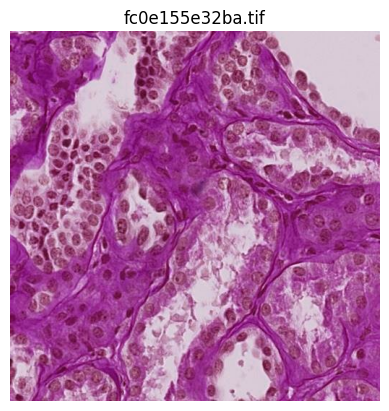

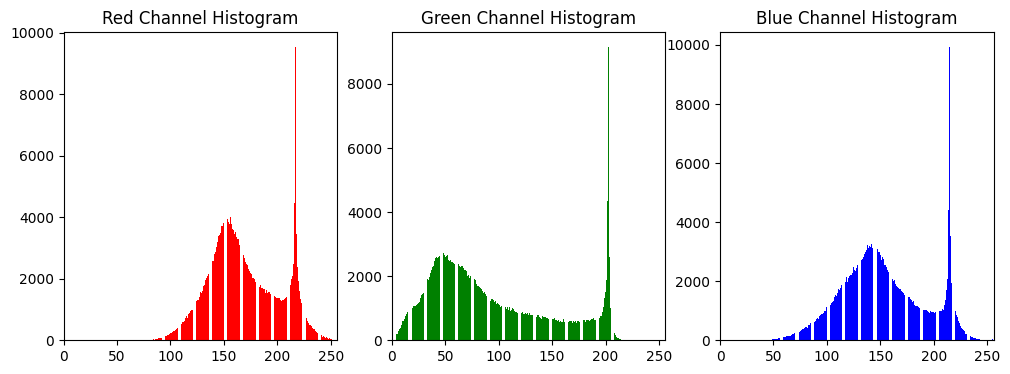

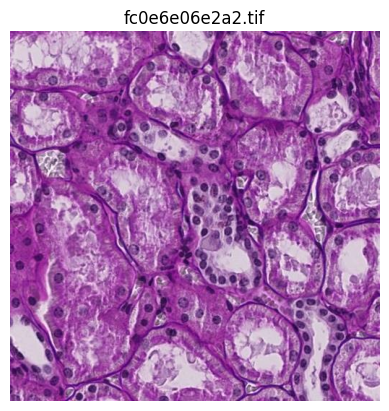

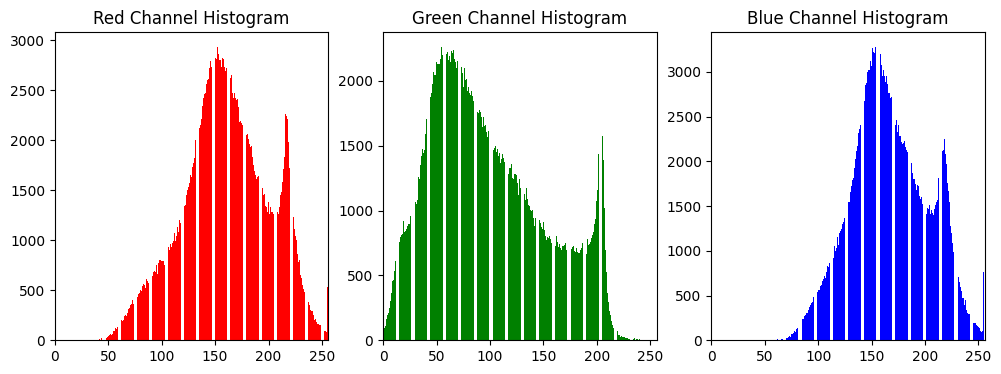

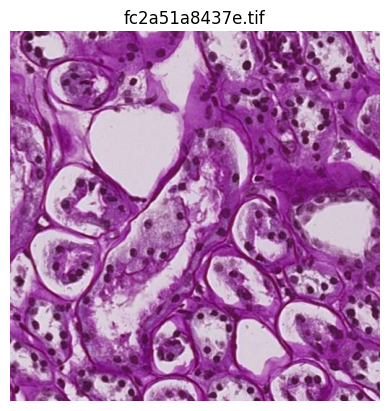

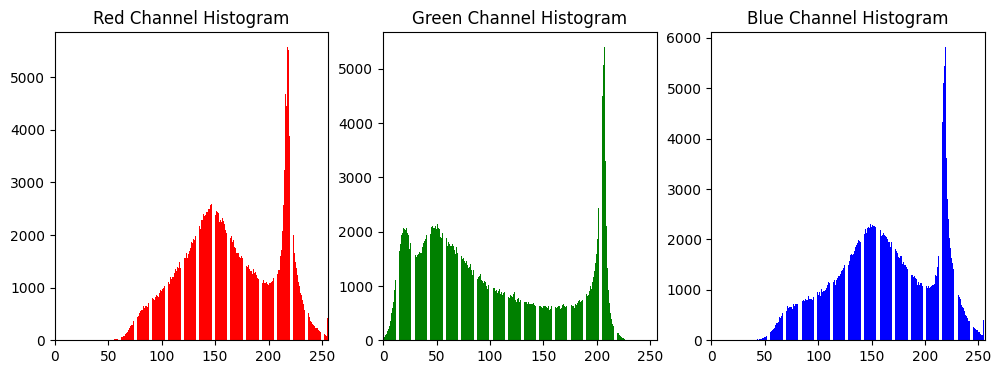

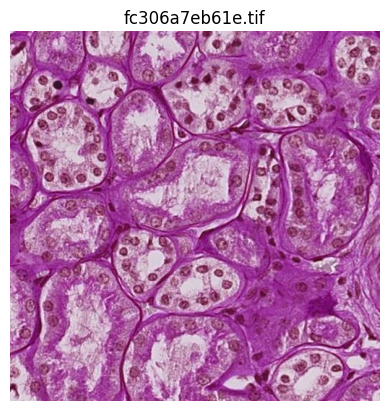

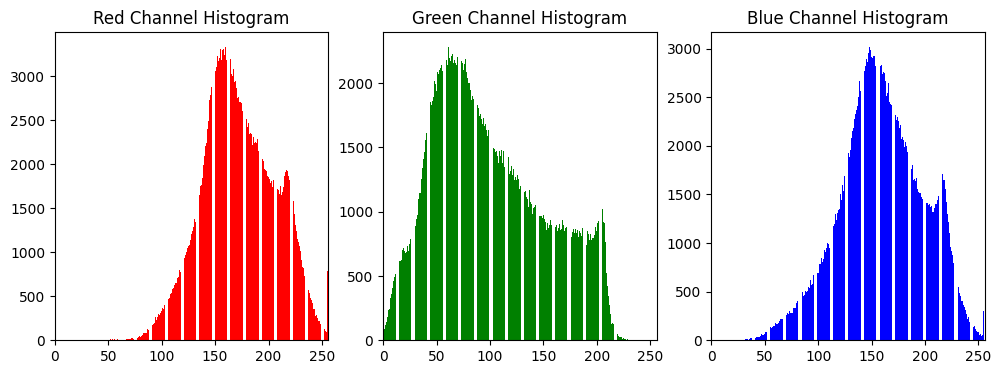

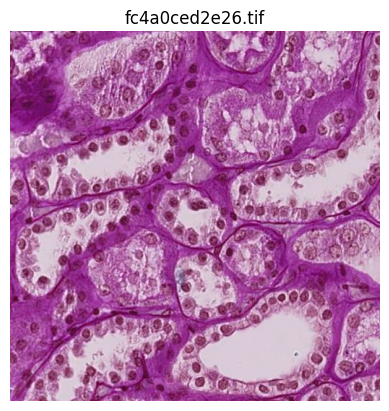

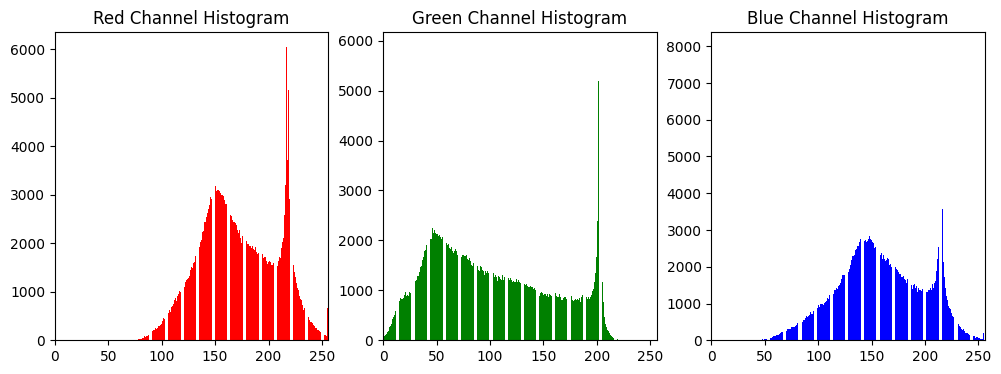

In [18]:
# Visualizar las primeras 5 imágenes y extraer histogramas
N = 5
for i, image_file in enumerate(image_files):
    if i >= N:
        break
    image_path = os.path.join(image_folder, image_file)
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(image_file)
    plt.axis('off')
    plt.show()

    # Extraer y mostrar histograma de color
    histogram = extract_color_histogram(image_path)
    plt.figure(figsize=(12, 4))
    for j, color in enumerate(['Red', 'Green', 'Blue']):
        plt.subplot(1, 3, j + 1)
        plt.bar(range(256), histogram[j], color=color.lower())
        plt.title(f'{color} Channel Histogram')
        plt.xlim([0, 256])
    plt.show()

In [15]:

from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


data_dir = 'train'


images = []
labels = []


image_size = (128, 128)
num_samples_per_class = 50
classes = ['class1', 'class2']

for class_label in classes:
    class_dir = os.path.join(data_dir, class_label)
    

    for filename in os.listdir(class_dir)[:num_samples_per_class]:
        if filename.endswith(".tif"):
            image_path = os.path.join(class_dir, filename)
            img = Image.open(image_path)
            img = img.resize(image_size, Image.ANTIALIAS)
            img = np.array(img) / 255.0  
            images.append(img)
            labels.append(class_label)

images = np.array(images)
labels = np.array(labels)


indices = np.arange(len(images))
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]

split_ratio = 0.8  
split_index = int(len(images) * split_ratio)

X_train = images[:split_index]
y_train = labels[:split_index]
X_validation = images[split_index:]
y_validation = labels[split_index:]


model = keras.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(
    X_train,
    (y_train == 'class2').astype(int),  
    epochs=10,  
    validation_data=(X_validation, (y_validation == 'class2').astype(int))
)


C:\Users\alegu\AppData\Local\Temp\ipykernel_416\2729035622.py:28: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(image_size, Image.ANTIALIAS)


Epoch 1/10
3/3 [==============================] - 2s 390ms/step - loss: 1.3024 - accuracy: 0.5250 - val_loss: 1.6387 - val_accuracy: 0.4500
Epoch 2/10
3/3 [==============================] - 1s 356ms/step - loss: 1.2000 - accuracy: 0.5250 - val_loss: 0.7230 - val_accuracy: 0.5500
Epoch 3/10
3/3 [==============================] - 1s 314ms/step - loss: 0.7672 - accuracy: 0.5125 - val_loss: 0.6901 - val_accuracy: 0.5500
Epoch 4/10
3/3 [==============================] - 1s 312ms/step - loss: 0.6946 - accuracy: 0.5250 - val_loss: 0.6935 - val_accuracy: 0.4500
Epoch 5/10
3/3 [==============================] - 1s 306ms/step - loss: 0.6832 - accuracy: 0.5250 - val_loss: 0.6922 - val_accuracy: 0.4500
Epoch 6/10
3/3 [==============================] - 1s 312ms/step - loss: 0.6781 - accuracy: 0.5500 - val_loss: 0.6830 - val_accuracy: 0.7500
Epoch 7/10
3/3 [==============================] - 1s 312ms/step - loss: 0.6552 - accuracy: 0.7000 - val_loss: 0.6805 - val_accuracy: 0.7500
Epoch 8/10
3/3 [====

In [7]:
import os
import cv2


train_folder = 'train'


output_folder = 'output'

threshold_value = 200  
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))


if not os.path.exists(output_folder):
    os.makedirs(output_folder)


def segment_blood_vessels(image_path):

    image = cv2.imread(image_path)

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    preprocessed_image = clahe.apply(gray_image)


    _, binary_mask = cv2.threshold(preprocessed_image, threshold_value, 255, cv2.THRESH_BINARY)


    dilated_mask = cv2.dilate(binary_mask, kernel, iterations=1)


    final_mask = cv2.erode(dilated_mask, kernel, iterations=1)

    return final_mask


for class_folder in os.listdir(train_folder):
    class_folder_path = os.path.join(train_folder, class_folder)
    
    if os.path.isdir(class_folder_path):
        output_class_folder = os.path.join(output_folder, class_folder)
        
        if not os.path.exists(output_class_folder):
            os.makedirs(output_class_folder)

        for image_file in os.listdir(class_folder_path):
            if image_file.endswith('.jpg') or image_file.endswith('.png') or image_file.endswith('.tif'):
                image_path = os.path.join(class_folder_path, image_file)
                segmented_image = segment_blood_vessels(image_path)

                output_filename = os.path.splitext(image_file)[0] + '.png'
                output_path = os.path.join(output_class_folder, output_filename)
                cv2.imwrite(output_path, segmented_image)

print("Blood vessel segmentation completed. Segmented images saved as .png files.")


Blood vessel segmentation completed. Segmented images saved as .png files.


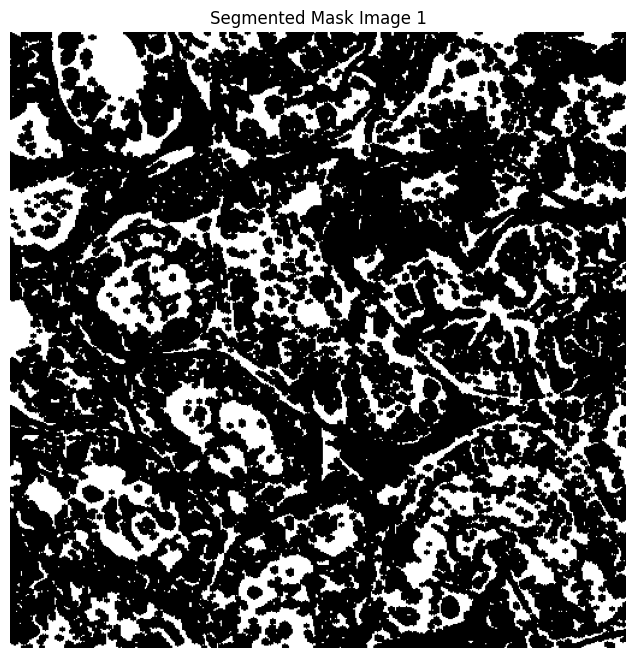

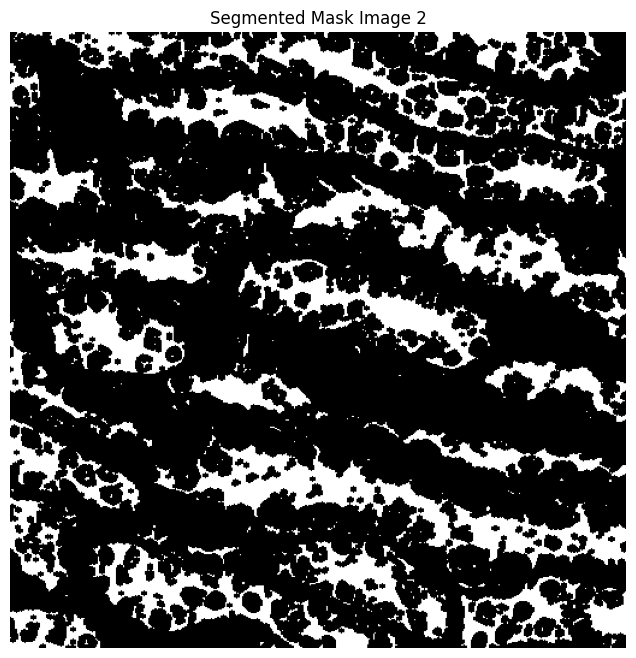

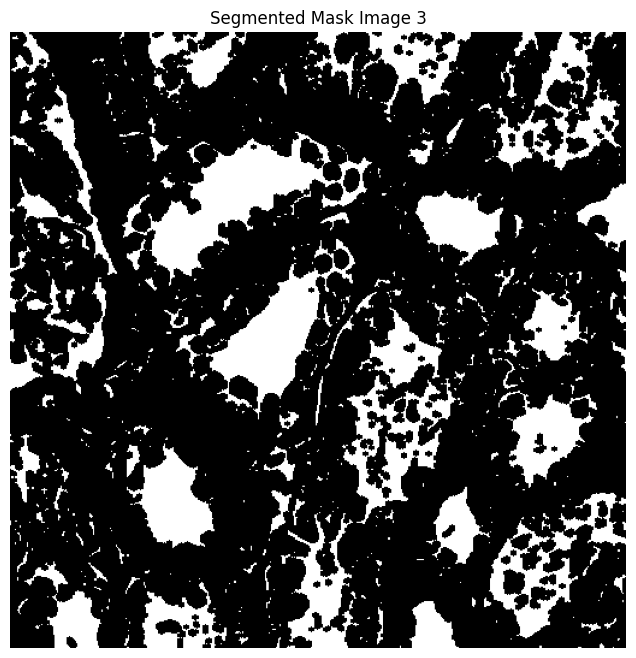

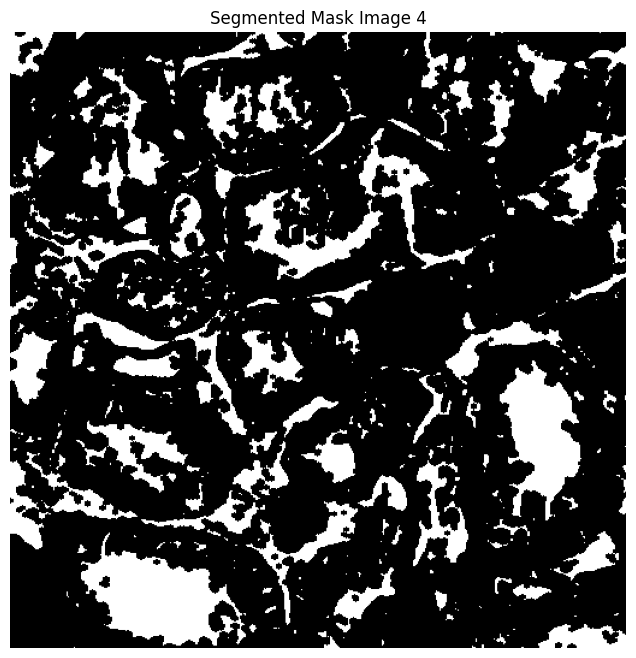

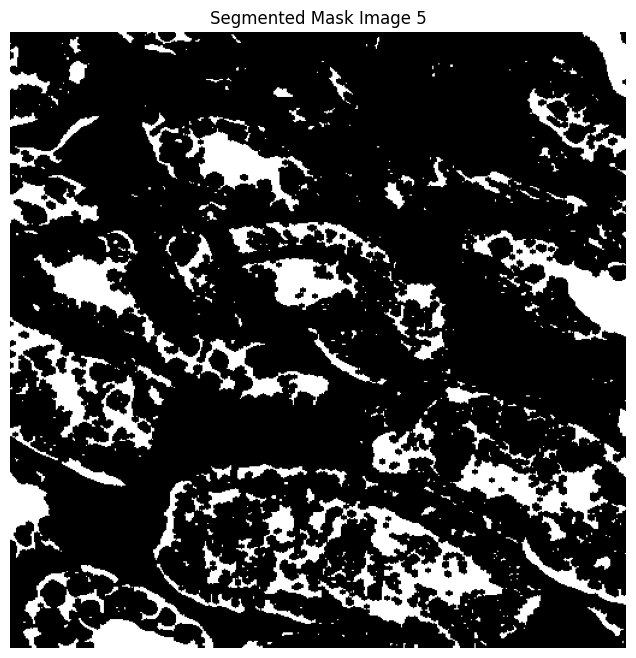

Displayed 5 segmented mask images.


In [8]:
import os
import cv2
import matplotlib.pyplot as plt


output_folder = 'output'


mask_files = []
for root, dirs, files in os.walk(output_folder):
    for file in files:
        if file.endswith('.png'):
            mask_files.append(os.path.join(root, file))


num_images_to_show = 5

for i in range(num_images_to_show):
    if i < len(mask_files):
        mask_image = cv2.imread(mask_files[i], cv2.IMREAD_GRAYSCALE)
        plt.figure(figsize=(8, 8))
        plt.imshow(mask_image, cmap='gray')
        plt.title(f'Segmented Mask Image {i+1}')
        plt.axis('off')
        plt.show()
    else:
        break

print(f"Displayed {min(num_images_to_show, len(mask_files))} segmented mask images.")
